In [82]:
%matplotlib inline
from sklearn.datasets import load_iris
import numpy as np
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

In [69]:
from sklearn.tree import export_graphviz
import graphviz 

iris_dataset = load_iris()
X = iris_dataset.data
y = iris_dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Exercise: Decision Trees, Combining Methods, Neural Networks

In this exercise we will use decision trees and neural networks for classification of Iris species (Setosa, Versicolor, Virginica). For use random_state=0 for splitting and building all models.

### 1) Fit decision tree with maximum depth (max_depth) of 2 and the default gini index for building the tree. Find the classification accuracy. 

The classification accuracy of decision tree is 0.894736842105


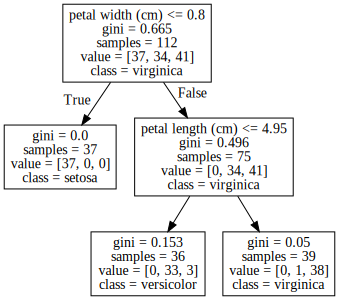

In [39]:
clf = DecisionTreeClassifier(random_state=0, max_depth=2)
FittedTreeModel = clf.fit(X_train, y_train)

clf_accuracy = clf.score(X_test, y_test)
print('The classification accuracy of decision tree is', clf_accuracy)

dot_data=export_graphviz(FittedTreeModel, class_names=iris_dataset.target_names, feature_names=iris_dataset.feature_names, out_file=None)
graph = graphviz.Source(dot_data)  
graph

### 2) Use random forests that combines 4 trees, each of maximum depth 2 and maximum number of features considered at each split is 2. What is the classification accuracy?

In [56]:
rfc = RandomForestClassifier(n_estimators=4, max_features=2, max_depth=2, random_state=0)
rfc.fit(X_train, y_train)
rfc_accuracy = rfc.score(X_test, y_test)
print('The classification accuracy of random forest is', clf_accuracy)

The classification accuracy of random forest is 0.894736842105


### 3) Use AdaBoost with 4 trees to perform the classification. What is the accuracy? Comment on results

In [66]:
BoostModel= AdaBoostClassifier(n_estimators=4)
BoostModel.fit(X_train, y_train)
bst_accuracy = BoostModel.score(X_test, y_test)
print('The accuracy of Adaboost classification is', bst_accuracy)

The accuracy of Adaboost classification is 0.973684210526


### 4) Scale the feautures with MinMaxScaler and use neural networks (MLPClassifier). Build a model that has two hidden layers, the first layer has 10 neurons and second layer has 5 neurons. Use 'relu' activation function, and set the regularization parameter alpha=0.5. 

#### a) Use gradient descent to solve the optimization  problem (i.e. get the weights), and choose random_state=0 (which corresponds to a particular initializationo of weight values). Print the accuracy.

In [71]:
scaler = MinMaxScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test) 

In [84]:
MLPmodel = MLPClassifier(solver='sgd', activation='relu', random_state=0, hidden_layer_sizes=[10, 5], alpha=0.5)
MLPmodel.fit(X_train_transformed, y_train)
mlp_accuracy = MLPmodel.score(X_test_transformed, y_test)
print('The accuracy of MLPClassifier is', mlp_accuracy)

The accuracy of MLPClassifier is 0.578947368421


#### b) Repeat (a) but with a model that use random_state=10 to initialize the weights. Print the accuracy.

In [83]:
MLPmodel = MLPClassifier(solver='sgd', activation='relu', random_state=10, hidden_layer_sizes=[10, 5], alpha=0.5)
MLPmodel.fit(X_train_transformed, y_train)
mlp_accuracy = MLPmodel.score(X_test_transformed, y_test)
print('The accuracy of MLPClassifier is', mlp_accuracy)

The accuracy of MLPClassifier is 0.421052631579


#### b) Repeat (b) but with model that use L-BFGS (a numerical quasi-Newton method) instead of stochastic gradient descent to find the weights. Print the accuracy   

In [80]:
MLPmodel = MLPClassifier(solver='lbfgs', activation='relu', random_state=0, hidden_layer_sizes=[10, 5], alpha=0.5)
MLPmodel.fit(X_train_transformed, y_train)
mlp_accuracy = MLPmodel.score(X_test_transformed, y_test)
print('The accuracy of MLPClassifier using L-BFGS is', mlp_accuracy)

The accuracy of MLPClassifier using L-BFGS is 0.973684210526
